Krishu dhakal
2227771 AI
 workshop 3

In [ ]:
def MCP_Neurons_AND(X1, X2, T):
    """
    This function implements basic AND operations with MCP Neuron for two inputs.

    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): An state of neuron 1 or 0 for the particular inputs.
    """

    assert len(X1) == len(X2)

    # Perform an element-wise addition of two input arrays stored in a new array (list):
    sum_array = [x1 + x2 for x1, x2 in zip(X1, X2)]

    # Create a new array to put all the predictions, let's name that state_neuron:
    state_neuron = []

    # Append 1 in state_neuron if sum(element) of above list is above Threshold else append 0.
    for element in sum_array:
        if element >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron


In [ ]:
import numpy as np
import tensorflow as tf

# Define XOR input and output data
x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_train = np.array([[0], [1], [1], [0]], dtype=np.float32)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_dim=2, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=1000, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(x_train, y_train)
print(f'Accuracy: {accuracy}')

# Predict using the trained model
predictions = model.predict(x_train)
print('Predictions:')
for i in range(len(x_train)):
    print(f'Input: {x_train[i]}, Predicted Output: {predictions[i]}')


1/1 [==============================] - 0s 123ms/step - loss: 0.6871 - accuracy: 0.7500
Accuracy: 0.75
1/1 [==============================] - 0s 49ms/step
Predictions:
Input: [0. 0.], Predicted Output: [0.495923]
Input: [0. 1.], Predicted Output: [0.5117786]
Input: [1. 0.], Predicted Output: [0.495923]
Input: [1. 1.], Predicted Output: [0.49945703]


In [ ]:
import numpy as np

class Rperceptron(object):

    def __init__(self, rate=0.01, nepochs=10):
        self.rate = rate
        self.nepochs = nepochs

    def learn(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        return self

    def agg_input(self, X):
        pass

    def predict(self, X):
        pass


In [ ]:
import numpy as np

def test_Rperceptron():
  learning_rate = 0.01
  epochs = 10
  X_train = np.array([[0,0], [0,1], [1,0], [1,1]])
  y_train = np.array([-1, -1, -1, 1])
  perceptron = Rperceptron(learning_rate, epochs)
  perceptron.learn(X_train, y_train)
  X_test = np.array([[0,0], [0,1], [1,0], [1,1]])
  expected_predictions = np.array([-1,-1,-1,1])
  predictions = perceptron.predict(X_test)

  assert np. array_equal(predictions, expected_predictions), "Predictioins do not match expected values"
  print("test passed successfully!")

  test_Rperceptron()

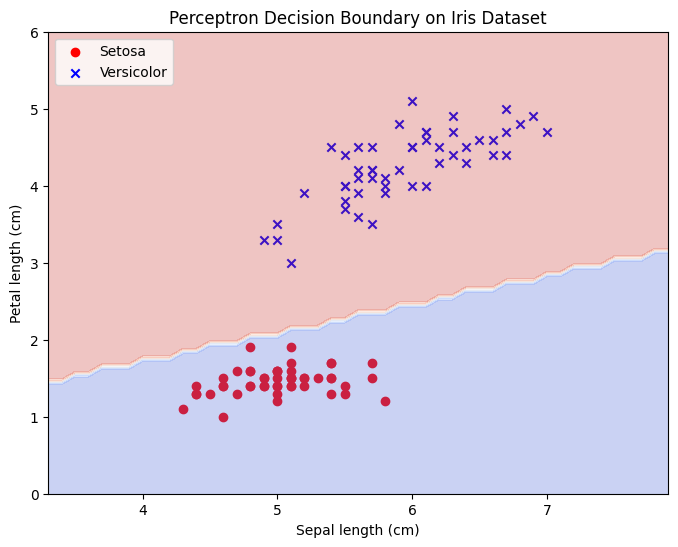

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the Rperceptron class
class Rperceptron(object):
    def __init__(self, rate=0.01, nepochs=10):
        self.rate = rate
        self.nepochs = nepochs

    def learn(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        for _ in range(self.nepochs):
            for xi, target in zip(X, y):
                update = self.rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
        return self

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, 0)

    def activation(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

# Step 1: Load the iris dataset
iris = load_iris()
X = iris.data[:, [0, 2]]  # Using only sepal length and petal length for visualization
y = iris.target

# Step 2: Preprocess the data
X = X[y != 2]  # Remove samples corresponding to the "iris virginica" class
y = y[y != 2]

# Step 3: Train the perceptron model
perceptron = Rperceptron(rate=0.1, nepochs=100)
perceptron.learn(X, y)

# Step 4: Visualize the decision boundary and the data points
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Versicolor')

# Plot decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = perceptron.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='coolwarm')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend(loc='upper left')
plt.title('Perceptron Decision Boundary on Iris Dataset')
plt.show()


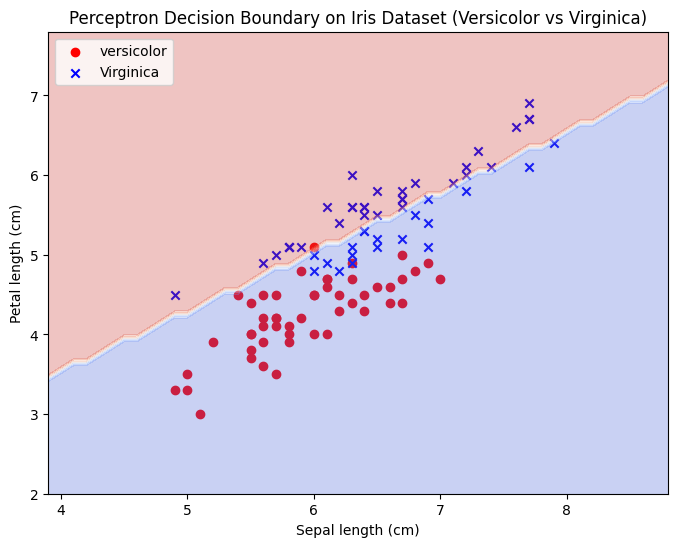

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[50:150, [0, 2]]  # Adjusted capitalization of 'X'
y = iris.target[50:150]

# Corrected instantiation of Perceptron
perceptron = Perceptron(eta0=0.1, max_iter=100)
perceptron.fit(X, y)  # Changed 'learn' to 'fit'

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="red", marker="o", label="versicolor")
plt.scatter(X[y == 2, 0], X[y == 2, 1], color="blue", marker="x", label="Virginica")  # Corrected color name
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = perceptron.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap="coolwarm")
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xlabel("Sepal length (cm)")
plt.ylabel("Petal length (cm)")
plt.legend(loc="upper left")
plt.title("Perceptron Decision Boundary on Iris Dataset (Versicolor vs Virginica)")
plt.show()
